In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


data = pd.read_csv('GOOG.csv', parse_dates=['date'], index_col='date')
data.drop(['high','low','symbol','open','volume','adjClose', 'adjHigh', 'adjLow', 'adjClose', 'adjOpen','adjVolume', 'divCash', 'splitFactor'],axis=1, inplace=True)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [13]:
train_data

,close
date,
2016-06-14 00:00:00+00:00,718.27
2016-06-15 00:00:00+00:00,718.92
2016-06-16 00:00:00+00:00,710.36
2016-06-17 00:00:00+00:00,691.72
2016-06-20 00:00:00+00:00,693.71
...,...
2020-06-05 00:00:00+00:00,1438.39
2020-06-08 00:00:00+00:00,1446.61
2020-06-09 00:00:00+00:00,1456.16


In [14]:
from keras.src.layers import GRU

scaler = MinMaxScaler()
train_data[['close']] = scaler.fit_transform(train_data[['close']])
test_data[['close']] = scaler.fit_transform(test_data[['close']])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 10
X_train, y_train = create_sequences(train_data[['close']].values, sequence_length)
X_test, y_test = create_sequences(test_data[['close']].values, sequence_length)

model = Sequential([
    GRU(units=64, activation='relu', input_shape=(sequence_length, 1)),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=100, batch_size=128)

loss = model.evaluate(X_test, y_test)
print(f'loss on test set: {loss}')

predictions = model.predict(X_test)
predictions

Epoch 1/100
8/8 [==============================] - 2s 8ms/step - loss: 0.1918
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1012
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0408
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0126
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0094
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0061
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0045
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 8.1666e-04
Epoch 11/100
8/8 [==============================] - 0s 7ms/step - loss: 7.4721e-04
Epoch 12/100
8/8 [==============================] - 0s 8ms/step - loss: 7.6032e-04
Epoch 13/100
8/8 [==============================]

array([[0.07171964],
       [0.0374811 ],
       [0.03143927],
       [0.03725123],
       [0.05172526],
       [0.07148607],
       [0.09553895],
       [0.10449011],
       [0.1126245 ],
       [0.12258857],
       [0.14059837],
       [0.13763632],
       [0.13846765],
       [0.13572997],
       [0.13578144],
       [0.13487898],
       [0.15558459],
       [0.16486599],
       [0.17353387],
       [0.15528843],
       [0.14209573],
       [0.14276402],
       [0.1315187 ],
       [0.13430563],
       [0.14068615],
       [0.12413669],
       [0.11049611],
       [0.0992358 ],
       [0.09719428],
       [0.10795703],
       [0.11252958],
       [0.11556251],
       [0.11036351],
       [0.11798532],
       [0.12768479],
       [0.12857138],
       [0.1327417 ],
       [0.15206373],
       [0.15858127],
       [0.1758143 ],
       [0.1846905 ],
       [0.19200824],
       [0.203954  ],
       [0.22932954],
       [0.2355128 ],
       [0.24166562],
       [0.23980534],
       [0.249

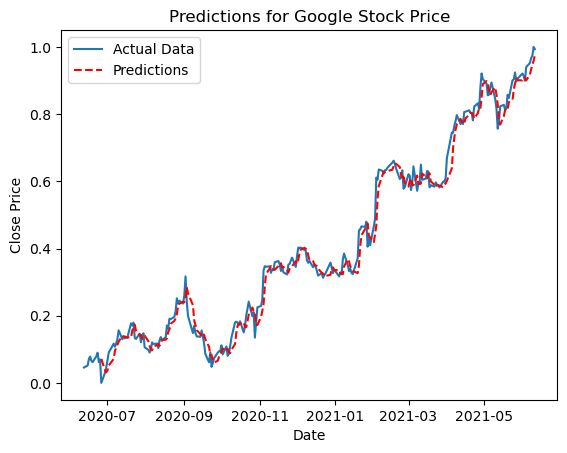

In [15]:
import matplotlib.pyplot as plt
plt.plot(test_data.index, test_data['close'], label='Actual Data')
plt.plot(test_data.index[-len(predictions):], predictions, color='red', linestyle='dashed', label='Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Predictions for Google Stock Price')
plt.legend()
plt.show()